In [1]:
%load_ext blackcellmagic

In [2]:
t = var('t')
v = var('c_1', domain='positive')
b = var('c_2', domain='positive')
f = c_1 * exp(-(c_2)*t)
show(f.integral(t, 0, infinity))

c_1/c_2

# Moment generating function - Gaussian

In [3]:
var('mu, sigma')
assume(sigma>0)
assume(mu, 'real')
f(x) = 1/(sigma*sqrt(2*pi)) * exp(-(x-mu)^2/(2*sigma^2))
show(f(x))

1/2*sqrt(2)*e^(-1/2*(mu - x)^2/sigma^2)/(sqrt(pi)*sigma)

In [4]:
# Moment-generating function M(t) = E(e^{Xt})
var('t')
assume(t > 0)
f(x) 
M(t) = simplify(integrate(exp(x*t)*f(x),x,-Infinity,Infinity))
show(M(t))

e^(1/2*sigma^2*t^2 + mu*t)

In [5]:
e_x = integrate(x*f(x),x,-Infinity,Infinity)
show(simplify(e_x))

mu

In [6]:
assume(sigma>0)
assume(mu > 0) # Not sure why we need this
v_x = integrate((x-mu)^2*f(x),x,-oo,oo)
show(simplify(v_x))

sigma^2

In [7]:
# Differentiate four times, set t=0 to get E(X^4)
e_x_2 = derivative(M(t),t,2)(t=0)
show(e_x_2)

mu^2 + sigma^2

In [8]:
# Differentiate four times, set t=0 to get E(X^4)
e_x_4 = derivative(M(t),t,4)(t=0)
show(e_x_4)

mu^4 + 6*mu^2*sigma^2 + 3*sigma^4

In [9]:
var_t = e_x_4 - e_x_2^(2)
show(expand(var_t))

4*mu^2*sigma^2 + 2*sigma^4

In [10]:
show(expand(16*(mu^2 + sigma^2)*sigma^2 + 4*sigma^4))

16*mu^2*sigma^2 + 20*sigma^4

In [11]:
variance = 1
gaussian = RealDistribution('gaussian', variance)

In [12]:
gaussian.cum_distribution_function(Infinity)

1.0

# Gaussian distribution

## Setup the PDF of a univariate $X \sim \mathcal{N}(\mu,\sigma^{2})$ distributed random variable

**Credits:**
- This uses [these slides}(http://www.utstat.utoronto.ca/~brunner/workshops/sagemath/SageMathIntro.pdf) from Prof. Jerry Bruner on Sagemath in Statistics

var('mu, sigma')
assume(sigma > 0)
assume(mu, 'real')
f(x) = simplify(1/(sigma*sqrt(2*pi)) * exp(-(x-mu)^2/(2*sigma^2)))
show(f(x))

In [13]:
var('x')
assume(x, 'real')
f(x) = simplify(1/(sqrt(2*pi)) * exp(-(x)^2/(2)))
show(f(x))

1/2*sqrt(2)*e^(-1/2*x^2)/sqrt(pi)

Looks like that is working, though with a rational numerator. But that is fine.

## Setup the CDF of a univariate $X \sim \mathcal{N}(\mu,\sigma^{2})$ distributed random variable

In [14]:
F(x) = integrate(f(t),t,-Infinity,x)
show(F(x))

1/4*sqrt(2)*(sqrt(2)*sqrt(pi)*erf(1/2*sqrt(2)*x) + sqrt(2)*sqrt(pi))/sqrt(pi)

This is in a slightly different form to what we typically use, i.e., just left in terms of the integral definition.

Let's test it out at extreme points $x \in {-\infty, 0, \infty}$.

In [15]:
print(f"F(x) evaluated at x = -Inf: {simplify(F(-Infinity))}")
print(f"F(x) evaluated at x = 0: {simplify(F(0))}")
print(f"F(x) evaluated at x = Inf: {simplify(F(Infinity))}")

F(x) evaluated at x = -Inf: 0
F(x) evaluated at x = 0: 1/2
F(x) evaluated at x = Inf: 1


Looks like that is working as expected. We should really plot this function over it's support $[-\infty, \infty]$.

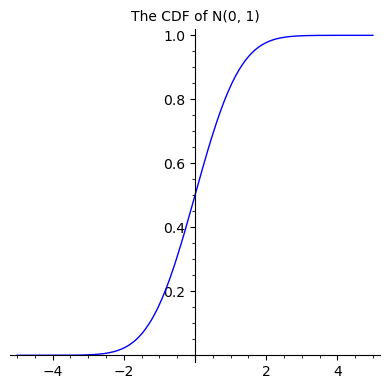

In [16]:
plot(F(x), x, (-5,5),
     figsize=(4,4),
     title="The CDF of N(0, 1)",)

Looks reasonable! Let's keep going!

## Solving an inequality

Let's define our function $g(\nu) := \sqrt{\nu^{2}+\frac{2}{\pi}} - \nu(2 \Phi(\nu)-1) - \sqrt{\frac{2}{\pi}} e^{-\nu^{2} / 2}$

In [17]:
var('v')
assume(v > 0) #TODO: check whether we want to try assume(v, 'real')
g(v) = sqrt(v^(2) + 2/pi) - v * (2 * F(v) - 1) - sqrt(2/pi)*exp(-v^(2)/2)
show(g(v))

-1/2*(sqrt(2)*(sqrt(2)*sqrt(pi)*erf(1/2*sqrt(2)*v) + sqrt(2)*sqrt(pi))/sqrt(pi) - 2)*v - sqrt(2)*e^(-1/2*v^2)/sqrt(pi) + sqrt(v^2 + 2/pi)

In [18]:
g_d_1(v) = derivative(g(v), v, 1)
show(simplify(g_d_1(v)))

-1/2*sqrt(2)*(sqrt(2)*sqrt(pi)*erf(1/2*sqrt(2)*v) + sqrt(2)*sqrt(pi))/sqrt(pi) + v/sqrt(v^2 + 2/pi) + 1

Let's check the largest term, is equivalent to $-2 \Phi(v)$, as per our hand calculations. 
So we can just check that the $g^{\prime}(v) - 1 - \frac{v}{\sqrt{v^2 + \frac{2}{pi}}} = - 2 \Phi(v)$

In [19]:
show(simplify(g_d_1(v) - v/(sqrt(v^(2) + 2/pi)) - 1 + 2 * F(v)))

0

This seems to reconcile the hand calculations, which is a good.
Let's try solving $g^{\prime}(v) = 0$, to get the possible global and local extrema.

In [20]:
solve(simplify(g_d_1(v)) == 0, v)

[v == sqrt((pi*v^2 + 2)/pi)*erf(1/2*sqrt(2)*v)]

This is not so useful, but we can now analyze the solution in more detail.

In particular, lets look at the limiting behaviour of $g^{\prime}(v)$ as $v \to 0^{+}$ and $v \to + \infty$

In [21]:
print(f"One extrema occurs at v = 0, i.e., implify(limit(g_d_1(v), v=0, dir='+')): {simplify(limit(g_d_1(v), v=0, dir='+'))}")
print(f"One extrema occurs at v = Inf, i.e., limit(g_d_1(v), v=Infinity): {limit(g_d_1(v), v=Infinity)}")

One extrema occurs at v = 0, i.e., implify(limit(g_d_1(v), v=0, dir='+')): 0
One extrema occurs at v = Inf, i.e., limit(g_d_1(v), v=Infinity): 0


Indeed, they are both 0, and global extrema.

In [22]:
g_d_2(v) = derivative(g(v), v, 2)
show(simplify(g_d_2(v)))

-sqrt(2)*e^(-1/2*v^2)/sqrt(pi) - v^2/(v^2 + 2/pi)^(3/2) + 1/sqrt(v^2 + 2/pi)

First observe that the function $h(v) = 2\Phi(v) - 1 = 2(\Phi(v) - \Phi(0))$ for each $v \in \mathbf{R}$, is concave, and twice differentiable. 

It is thus bounded by it's first derivative:


\begin{align*}
    h(y) 
    & \leq h(x) + h^{\prime}(x) (y - x) \text{, for all $x, y \in \mathbf{R}$} \\
\implies h(v)
    & \leq h(0) + h^{\prime}(0) (v) \text{, for all $v \in \mathbf{R}$} \\
\iff h(v)
    & = 2(\Phi(v) - \Phi(0)) \\
    & \leq h(0) + h^{\prime}(0) (v) \text{, for all $v \in \mathbf{R}$} \\
    & \leq 2 v \phi(0) \text{, for all $v \in \mathbf{R}$}        
\end{align*}

In [23]:
h(v) = 2 * F(v) - 1
h_d_1 = derivative(h(v), v, Integer(1))
# show(simplify(v*h_d_1(0)))
show(simplify(v*h_d_1).substitute(v = 0))

0

# Lemma 20

## Define variables

In [24]:
var('mu, sigma, C, n, gamma')
assume(sigma > 0)
assume(C > 0)
assume(mu, 'real')
assume(n, 'integer')
assume(n > 0)
assume(gamma, 'real')
assume(gamma > 0)
# assumptions()

Let us define the upper bound, which is a function of $t$. That is
\begin{equation}
f(t) = \frac{16C \sigma^2 + 20 \sigma^4}{n t^2}
\end{equation}

We will solve this for $t$, such that $f(t) = \gamma$ and also $f(t) = \gamma^{2}$ if that makes later parametrization easier.

### Solve $t$, such that $f(t) = \gamma$

In [25]:
f(t) = (16 * C * sigma^2 + 20 * sigma^4)/(n * t^2)
show(solve([f(t) - gamma == 0], t))

[t == 2*sigma*sqrt(5*sigma^2/(gamma*n) + 4*C/(gamma*n))]

### Solve $t$, such that $f(t) = \gamma^{2}$

In [26]:
f(t) = (16 * C * sigma^2 + 20 * sigma^4)/(n * t^2)
show(solve([f(t) - gamma^2 == 0], t))
# latex(solve([f(t) - gamma^2 == 0], t))

[t == 2*sigma*sqrt(5*sigma^2/n + 4*C/n)/gamma]

### Solve $t$, such that $f(t) = \frac{1}{\gamma^{2}}$

In [27]:
f(t) = (16 * C * sigma^2 + 20 * sigma^4)/(n * t^2)
show(solve([f(t) - 1/(gamma^2) == 0], t))
# latex(solve([f(t) - gamma^2 == 0], t))

[t == 2*gamma*sigma*sqrt(5*sigma^2/n + 4*C/n)]

In [48]:
j(t) = (4 * C * sigma^2 + 2 * sigma^4)/(n * t^2)
show(solve([j(t) - 1/(gamma^2) == 0], t))

[t == gamma*sigma*sqrt(2*sigma^2/n + 4*C/n)]

In [28]:
g(x) = x^(-1/3)*(1 + log(x))

Find the extrema value, i.e., where the first derivative is 0

In [29]:
show(diff(g(x), x, 1).full_simplify())

-1/3*(log(x) - 2)/x^(4/3)

In [30]:
sol = solve(diff(g(x), x, 1) == 0, x)
show(sol)

[x == e^2]

Check that the second derivative is negative at the identified extrema

In [31]:
latex(diff(g(x), x, 2).full_simplify())
show(diff(g(x), x, 2).full_simplify())

1/9*(4*log(x) - 11)/x^(7/3)

In [32]:
show(diff(g(x), x, 2).substitute(sol))
bool(diff(g(x), x, 2).substitute(sol) < 0)

-1/3*e^(-14/3)

True

So we have found a global maximum value. Let's substitute back into the original function.

In [33]:
show(g(x).substitute(sol))

3*e^(-2/3)

In [34]:
var('mu_1,mu_n,sigma_2,C_2')

(mu_1, mu_n, sigma_2, C_2)

In [35]:
upp_bound1 = (27/4)*((mu_n - mu_1)^(2/3))*(sigma_2 * C_2)^(4/3) + (6 * sigma_2^2 * C_2^2 * e^(-2/3))
show(upp_bound1)

6*C_2^2*sigma_2^2*e^(-2/3) + 27/4*(C_2*sigma_2)^(4/3)*(-mu_1 + mu_n)^(2/3)

In [36]:
# show(upp_bound1.full_simplify())
show(upp_bound1.simplify())

6*C_2^2*sigma_2^2*e^(-2/3) + 27/4*(C_2*sigma_2)^(4/3)*(-mu_1 + mu_n)^(2/3)

In [37]:
upp_bound2(t) = (n^(-2/3) * upp_bound1)/t
show(upp_bound2(t))

3/4*(8*C_2^2*sigma_2^2*e^(-2/3) + 9*(C_2*sigma_2)^(4/3)*(-mu_1 + mu_n)^(2/3))/(n^(2/3)*t)

### Solve $t$, such that $f(t) = \gamma$

In [38]:
upp_bound2_gamma = solve([upp_bound2(t) - gamma == 0], t)
show(upp_bound2_gamma)

[t == 3/4*(8*C_2^2*sigma_2^2 + 9*(C_2*sigma_2)^(4/3)*(-mu_1 + mu_n)^(2/3)*e^(2/3))*e^(-2/3)/(gamma*n^(2/3))]

In [39]:
latex(upp_bound2_gamma)

\left[t = \frac{3 \, {\left(8 \, C_{2}^{2} \sigma_{2}^{2} + 9 \, \left(C_{2} \sigma_{2}\right)^{\frac{4}{3}} {\left(-\mu_{1} + \mu_{n}\right)}^{\frac{2}{3}} e^{\frac{2}{3}}\right)} e^{\left(-\frac{2}{3}\right)}}{4 \, \gamma n^{\frac{2}{3}}}\right]

### Gaussian Distribution

PDF of $\mathcal{N}(0, 1)$, i.e., $\phi(x)$

In [40]:
var('mu, sigma, x')
assume(sigma>0)
assume(mu, 'real')
assume(x, 'real')
phi(x) = 1/(sigma*sqrt(2*pi)) * exp(-(x-mu)^2/(2*sigma^2))
show(phi(x))

1/2*sqrt(2)*e^(-1/2*(mu - x)^2/sigma^2)/(sqrt(pi)*sigma)

CDF of $\mathcal{N}(0, 1)$, i.e., $\Phi(x)$

In [41]:
Phi(x) = integrate(phi(t),t,-Infinity,x)
show(Phi(x))

1/4*sqrt(2)*(sqrt(2)*sqrt(pi)*sigma*erf(-1/2*(sqrt(2)*mu - sqrt(2)*x)/sigma) + sqrt(2)*sqrt(pi)*sigma)/(sqrt(pi)*sigma)

In [44]:
h(x) = (x * phi(x)) / (2 * Phi(x) - 1)
show(h(x))

sqrt(2)*x*e^(-1/2*(mu - x)^2/sigma^2)/(sqrt(pi)*sigma*(sqrt(2)*(sqrt(2)*sqrt(pi)*sigma*erf(-1/2*(sqrt(2)*mu - sqrt(2)*x)/sigma) + sqrt(2)*sqrt(pi)*sigma)/(sqrt(pi)*sigma) - 2))

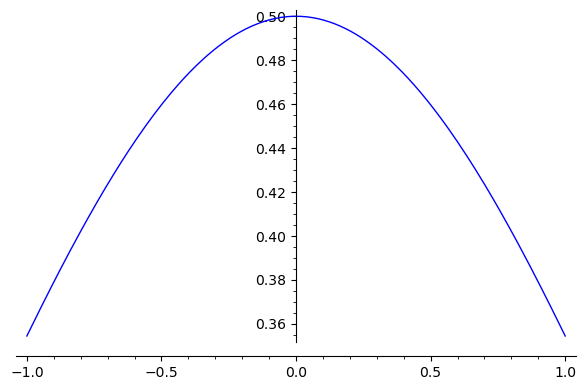

In [45]:
plot(h.substitute(mu = 0, sigma = 1))

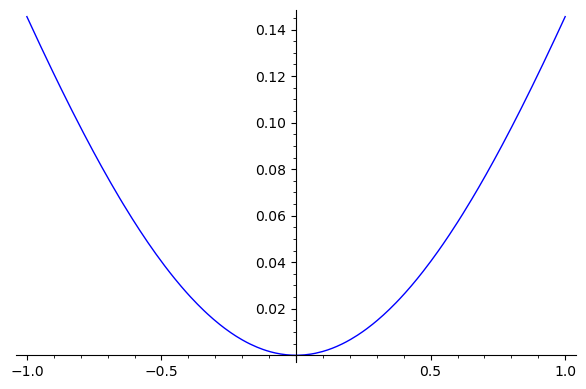

In [46]:
j(x) = 1/2 - h(x)
plot(j.substitute(mu = 0, sigma = 1))

# Analysis of $J(\sigma)$

### Gaussian Distribution

PDF of $\mathcal{N}(0, 1)$, i.e., $\phi(x)$

In [100]:
var('mu, sigma, x, eta')
assume(sigma > 0)
assume(eta > 0)
assume(mu, 'real')
assume(x, 'real')
phi(x) = 1/(sigma*sqrt(2*pi)) * exp(-(x-mu)^2/(2*sigma^2))
show(phi(x))

1/2*sqrt(2)*e^(-1/2*(mu - x)^2/sigma^2)/(sqrt(pi)*sigma)

CDF of $\mathcal{N}(0, 1)$, i.e., $\Phi(x)$

In [52]:
Phi(x) = integrate(phi(t),t,-Infinity,x)
show(Phi(x))

1/4*sqrt(2)*(sqrt(2)*sqrt(pi)*sigma*erf(-1/2*(sqrt(2)*mu - sqrt(2)*x)/sigma) + sqrt(2)*sqrt(pi)*sigma)/(sqrt(pi)*sigma)

In [53]:
h(x) = (x * phi(x)) / (2 * Phi(x) - 1)
show(h(x))

sqrt(2)*x*e^(-1/2*(mu - x)^2/sigma^2)/(sqrt(pi)*sigma*(sqrt(2)*(sqrt(2)*sqrt(pi)*sigma*erf(-1/2*(sqrt(2)*mu - sqrt(2)*x)/sigma) + sqrt(2)*sqrt(pi)*sigma)/(sqrt(pi)*sigma) - 2))

In [141]:
var('y')
assume(y > 0)
K(y) = (1/y)*(1/2 - h.substitute(x = y, sigma = 1, mu = 0))
show(K)

y |--> -1/2*(2*sqrt(2)*y*e^(-1/2*y^2)/(sqrt(pi)*(sqrt(2)*(sqrt(2)*sqrt(pi)*erf(1/2*sqrt(2)*y) + sqrt(2)*sqrt(pi))/sqrt(pi) - 2)) - 1)/y

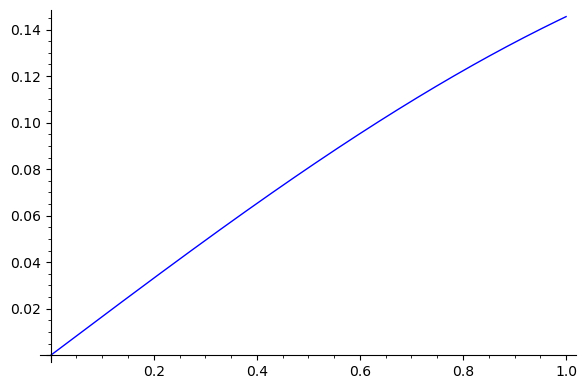

In [142]:
plot(K, (y, 0, 1))

In [144]:
J(sigma) = sigma*(1/2 - h.substitute(x = eta/sigma))
show(J)

sigma |--> -1/2*sigma*(2*sqrt(2)*eta*e^(-1/2*(mu - eta/sigma)^2/sigma^2)/(sqrt(pi)*sigma^2*(sqrt(2)*(sqrt(2)*sqrt(pi)*sigma*erf(-1/2*(sqrt(2)*mu - sqrt(2)*eta/sigma)/sigma) + sqrt(2)*sqrt(pi)*sigma)/(sqrt(pi)*sigma) - 2)) - 1)

In [145]:
J.substitute(mu = 0, eta = 1).substitute(sigma = 0.1).simplify()

sigma |--> 0.05

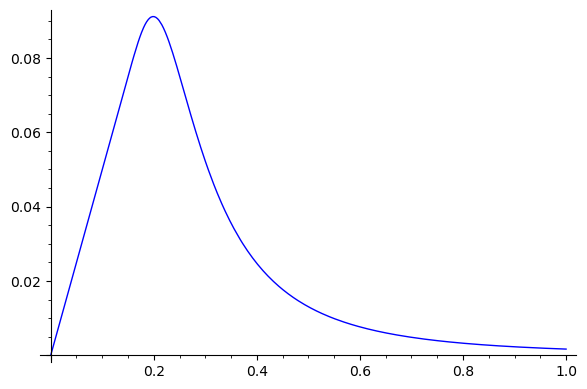

In [146]:
plot(J.substitute(mu = 0, eta = 0.1), (sigma, 0, 1))

In [158]:
J_sigma_d1 = diff(J.substitute(mu = 0, eta = 1), sigma, 1)
J_sigma_d1_simplify = J_sigma_d1.full_simplify()
# show(J_sigma_d1)
show(J_sigma_d1_simplify)

1/2*((sqrt(2)*pi*sigma^4*erf(1/2*sqrt(2)/sigma^2) - 2*sqrt(2)*pi*erf(1/2*sqrt(2)/sigma^2))*e^(1/2/sigma^4) + sqrt(pi)*(pi*sigma^6*erf(1/2*sqrt(2)/sigma^2)^2*e^(sigma^(-4)) - 4*sigma^2))*e^(-1/sigma^4)/(pi^(3/2)*sigma^6*erf(1/2*sqrt(2)/sigma^2)^2)

In [161]:
J_d1_sol = solve(J_sigma_d1_simplify == 0, sigma)
# show(J_d1_sol)
# latex(J_d1_sol)

In [163]:
J_sigma_d2 = diff(J.substitute(mu = 0, eta = 1), sigma, 2)
J_sigma_d2_simplify = J_sigma_d2.full_simplify()
show(J_sigma_d2_simplify)

(2*(5*pi*sigma^6*erf(1/2*sqrt(2)/sigma^2) - 6*pi*sigma^2*erf(1/2*sqrt(2)/sigma^2))*e^(1/2/sigma^4) - sqrt(pi)*(8*sqrt(2)*sigma^4 + (sqrt(2)*pi*sigma^8*erf(1/2*sqrt(2)/sigma^2)^2 - 7*sqrt(2)*pi*sigma^4*erf(1/2*sqrt(2)/sigma^2)^2 + 2*sqrt(2)*pi*erf(1/2*sqrt(2)/sigma^2)^2)*e^(sigma^(-4))))*e^(-3/2/sigma^4)/(pi^2*sigma^11*erf(1/2*sqrt(2)/sigma^2)^3)

In [148]:
J_sigma_d1_simplify = J_sigma_d1.full_simplify()
show(J_sigma_d1_simplify)

1/2*((sqrt(2)*pi*eta*sigma^4*erf(1/2*sqrt(2)*eta/sigma^2) - 2*sqrt(2)*pi*eta^3*erf(1/2*sqrt(2)*eta/sigma^2))*e^(1/2*eta^2/sigma^4) + sqrt(pi)*(pi*sigma^6*erf(1/2*sqrt(2)*eta/sigma^2)^2*e^(eta^2/sigma^4) - 4*eta^2*sigma^2))*e^(-eta^2/sigma^4)/(pi^(3/2)*sigma^6*erf(1/2*sqrt(2)*eta/sigma^2)^2)

verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 39 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'math range error'


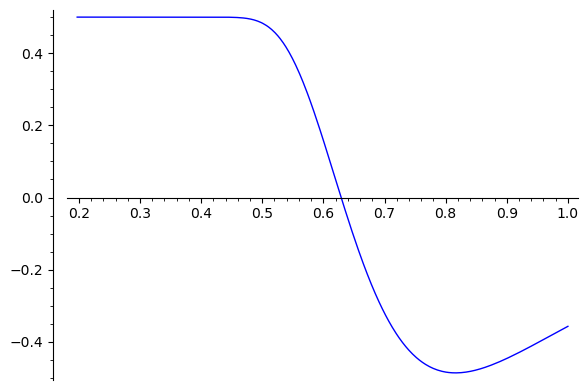

In [149]:
plot(J_sigma_d1_simplify.substitute(eta = 1), (sigma, 0, 1))

In [150]:
import numpy as np

In [151]:
Fd = RealField(200)
eta_test = 3
sigma_min = 0.01
sigma_diff = 0.01
sigma_max = 1

# TODO: Hack - fix this using np.linspace
sigma_rng = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]

# Check high precision derivative calculations for various values of sigma, for eta = eta_test
out_vals = {sig_val : Fd(J_sigma_d1_simplify.substitute(eta = eta_test, sigma = sig_val)) 
            for sig_val in sigma_rng}
out_vals

{0.0100000000000000: 0.49999999999999996097690577526989096164164491193577493115594,
 0.0200000000000000: 0.50000000000000003713535711194361318645277200704622536127867,
 0.0300000000000000: 0.49999999999999993096337269826968734951481866444955376519972,
 0.0400000000000000: 0.50000000000000004506876280654591118283314729106015918849937,
 0.0500000000000000: 0.50000000000000002588219365086387511562063403060484833169448,
 0.0600000000000000: 0.49999999999999985794775817227798565598907488776737586585009,
 0.0700000000000000: 0.49999999999999998285075222332444912753508662988814275755590,
 0.0800000000000000: 0.50000000000000000801848361364536245945578141666003007103040,
 0.0900000000000000: 0.49999999999999997701399529767327613461661573664095366257865,
 0.100000000000000: 0.49999999999999998445585787807658139653487799597188810711107,
 0.110000000000000: 0.49999999999999996789815424816784888744590676987859459092875,
 0.120000000000000: 0.49999999999999998213674702751445827004269132209189884516

In [102]:
K(sigma) = -2 * eta^2 * sigma^2 + (sqrt(pi) * sqrt(2) * eta * erf((eta * sqrt(2))/(2 * sigma^2)))*(sigma^4 - eta^2)*exp((eta^2)/(2 * sigma^4))
show(K)

sigma |--> sqrt(2)*sqrt(pi)*(sigma^4 - eta^2)*eta*erf(1/2*sqrt(2)*eta/sigma^2)*e^(1/2*eta^2/sigma^4) - 2*eta^2*sigma^2

In [103]:
show(K.substitute(eta = 1))

sigma |--> sqrt(2)*sqrt(pi)*(sigma^4 - 1)*erf(1/2*sqrt(2)/sigma^2)*e^(1/2/sigma^4) - 2*sigma^2

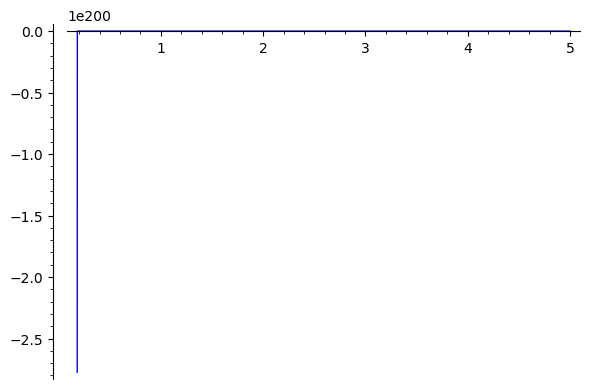

In [138]:
plot(K.substitute(eta = 1), (sigma, 0.01, 5))